In [9]:
import sims
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
file_name = "test"
motor_name = "AeroTech_N3300R"

file = sims.File_simulation(file_name, motor_name)

File and motor verified
Creating rocket for test with motor AeroTech_N3300R
Rocket created and ready for simulation. WARNING: Parachutes not added.


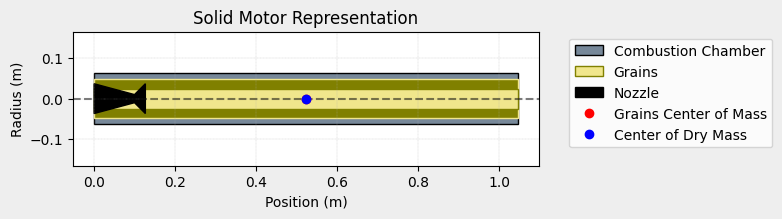

Nozzle Details
Nozzle Radius: 0.03675 m
Nozzle Throat Radius: 0.01 m

Grain Details
Number of Grains: 1
Grain Spacing: 0.0 m
Grain Density: 1269.4646112306802 kg/m3
Grain Outer Radius: 0.049 m
Grain Inner Radius: 0.0245 m
Grain Height: 1.046 m
Grain Volume: 0.006 m3
Grain Mass: 7.512 kg

Motor Details
Total Burning Time: 4.519 s
Total Propellant Mass: 7.512 kg
Structural Mass Ratio: 0.377
Average Propellant Exhaust Velocity: 1868.363 m/s
Average Thrust: 3105.808 N
Maximum Thrust: 3775.78 N at 0.125 s after ignition.
Total Impulse: 14035.146 Ns



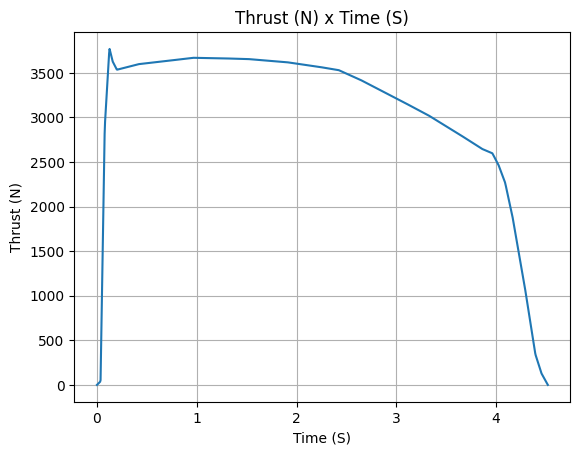

In [3]:
file.graph_motor()
file.show_motor_info()

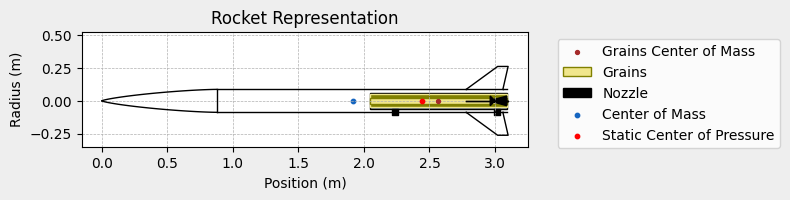


Inertia Details

Rocket Mass: 20.272 kg (without motor)
Rocket Dry Mass: 24.814 kg (with unloaded motor)
Rocket Loaded Mass: 32.326 kg
Rocket Structural Mass Ratio: 0.768
Rocket Inertia (with unloaded motor) 11: 6.820 kg*m2
Rocket Inertia (with unloaded motor) 22: 6.820 kg*m2
Rocket Inertia (with unloaded motor) 33: 40.382 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0875 m
Rocket Frontal Area: 0.024053 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.190 m
Rocket Center of Dry Mass - Nozzle Exit: 1.370 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.847 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.197 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 8.215/rad

Center of Pressure

No

In [4]:
file.graph_rocket()
file.show_rocket_info()

In [6]:
lat = 40.4168
lon = -3.7038
elev = 667  # Elevation in meters

env = sims.generate_cte_wind_cte_angle(lat=lat, lon=lon, elev=elev, angle=180, speed=5)



envs = [env]
env_names = ["normal"]
rail_lengths = [5.7]
inclinations = [0]
headings = [0]
elevations = [0]


multiple_files, keys = file.run_multiple_flight_sims(envs=envs, envs_names=env_names,
    rail_lengths=rail_lengths,
    inclinations=inclinations,
    headings=headings,
    elevations=elevations
)

df = sims.compare_usual_important_data(multiple_files, keys)

Runnin sim0
Simulation 0 completed


In [7]:
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
df

,ENV_normal_RL5.7_INC0_HDG0_ELEV0
Variable,
initial_static_margin [calibers],2.990
frontal_surface_wind [m/s],5.000
lateral_surface_wind [m/s],0.000
out_rail_vel [m/s],31.410
out_rail_stability [calibers],3.063
out_rail_angle_of_attack [deg],9.045
out_rail_thrust_to_weight [ratio],11.521
burn_out_dynamic_pressure [Pa],76448.888
burn_out_time [s],4.519


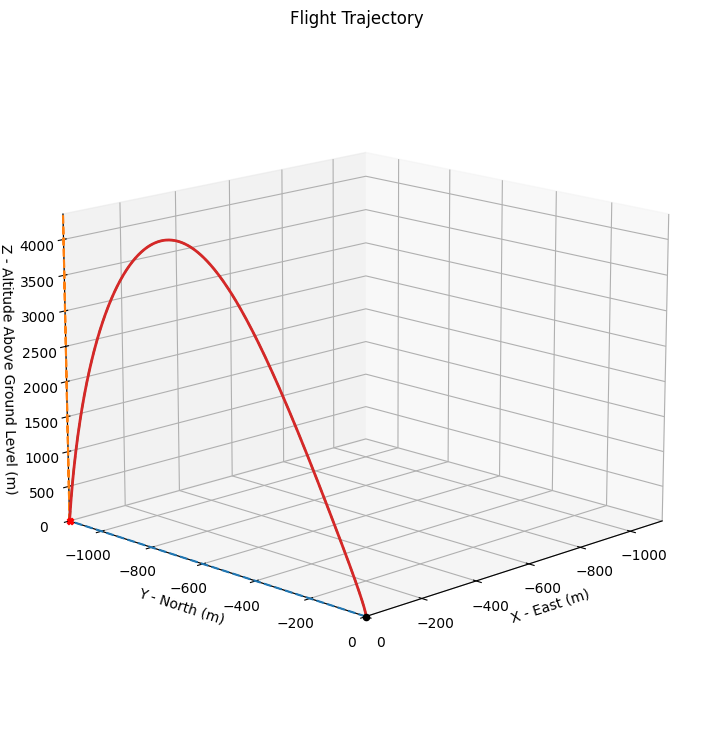

In [8]:
multiple_files[keys[0]].plots.trajectory_3d()

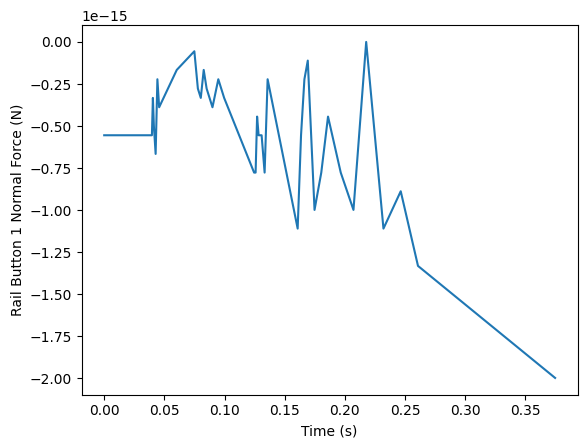

array([-5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -5.55111512e-16,
       -5.55111512e-16, -5.55111512e-16, -5.55111512e-16, -3.33066907e-16,
       -4.99600361e-16, -6.66133815e-16, -2.22044605e-16, -3.88578059e-16,
       -1.66533454e-16, -5.55111512e-17, -2.77555756e-16, -3.33066907e-16,
       -1.66533454e-16, -2.77555756e-16, -3.88578059e-16, -2.22044605e-16,
       -3.33066907e-16, -7.77156117e-16, -7.77156117e-16, -4.44089210e-16,
       -5.55111512e-16, -5.55111512e-16, -7.77156117e-16, -2.22044605e-16,
       -1.11022302e-15, -5.55111512e-16, -2.22044605e-16, -1.11022302e-16,
       -9.99200722e-16, -7.77156117e-16, -4.44089210e-16, -7.77156117e-16,
       -9.99200722e-16,  0.00000000e+00, -1.11022302e-15, -8.88178420e-16,
       -1.33226763e-15, -1.99840144e-15])

In [15]:
t, rb1_normal, rb1_shear, rb2_normal, rb2_shear = sims.extract_rb_ind(multiple_files[keys[0]])

# graph
plt.plot(t, rb1_normal)
plt.xlabel("Time (s)")
plt.ylabel("Rail Button 1 Normal Force (N)")
plt.show()

rb1_normal

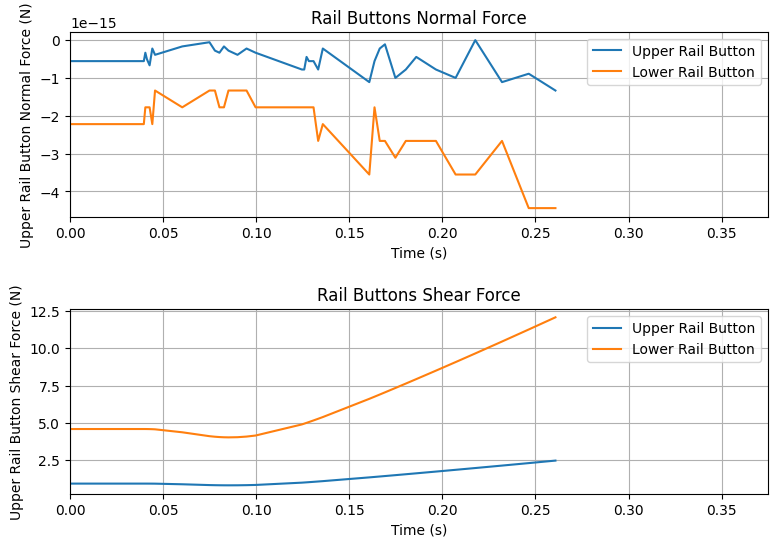

In [14]:
multiple_files[keys[0]].plots.rail_buttons_forces()